# Sentiment Analysis on Articles from Slate (Left leaning news outlet) and Breitbart (Right leaning news outlet) Reporting Trump's Election

In [1]:
# import packages
import numpy as np
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import re
from urllib.parse import urlparse
import urllib.robotparser
from bs4 import BeautifulSoup

# This code checks the robots.txt file
def canFetch(url):

    parsed_uri = urlparse(url)
    domain = '{uri.scheme}://{uri.netloc}/'.format(uri=parsed_uri)

    rp = urllib.robotparser.RobotFileParser()
    rp.set_url(domain + "/robots.txt")
    try:
        rp.read()
        canFetchBool = rp.can_fetch("*", url)
    except:
        canFetchBool = None
    
    return canFetchBool

In [2]:
# check if can scrape the URLs
breitbart_election_url = 'https://www.breitbart.com/social-justice/2016/11/16/what-trump-means/'
canFetch(breitbart_election_url)

True

In [3]:
slate_election_url = 'https://slate.com/news-and-politics/2016/11/how-to-manipulate-donald-trump.html'
canFetch(slate_election_url)

True

In [4]:
# list of URLs
urls = [slate_election_url, breitbart_election_url]

In [5]:
# get text from first url
slate_election = requests.get(urls[0])
slate_election_text = slate_election.text
Nchars = 10000
print(slate_election_text[:Nchars])
print('\n\n...' + str(len(slate_election_text)-Nchars) + ' addtional characters')

  <!DOCTYPE html>
<html
  lang="en"
  data-uri="slate.com/_pages/cq-article-86b5b88c217d9b21338c01854747bf43@published"
  data-layout-uri="slate.com/_layouts/layout-one-column/instances/article@published"
    data-myslateUrl="https://my.slate.com"
    data-env="prod"
    data-trackingdomain=".slate.com"
>
  <head>
    <meta charset="utf-8">
    <meta http-equiv="X-UA-Compatible" content="IE=edge">
    <meta name="viewport" content="width=device-width,initial-scale=1,shrink-to-fit=no">

    <!-- data-editable="head" -->
      <!-- data-uri="slate.com/_components/clay-meta-title/instances/cq-article-86b5b88c217d9b21338c01854747bf43-component-0@published" -->
  <title>How to manipulate Donald Trump.</title>
<meta property="og:title" content="Donald Trump Is an Emotional Weakling. Here’s How to Manipulate Him.">
<meta name="twitter:title" content="Donald Trump Is an Emotional Weakling. Here’s How to Manipulate Him.">

  <!-- data-uri="slate.com/_components/clay-meta-url/instances/cq-articl

In [6]:
# get text from second url
breitbart_election = requests.get('https://www.breitbart.com/social-justice/2016/11/16/what-trump-means/')
breitbart_election_text = breitbart_election.text
Nchars = 10000
print(breitbart_election_text[:Nchars])
print('\n\n...' + str(len(breitbart_election_text)-Nchars) + ' addtional characters')

<!DOCTYPE html>
<html lang="en" prefix="og: http://ogp.me/ns# fb: http://ogp.me/ns/fb# op: http://media.facebook.com/op# article: http://ogp.me/ns/article#" class="post-tmpl-default single single-post pid-5537102 tf-single pt-post c-social-justice">
<head>
	<meta charset="utf-8">
	<meta name="viewport" content="width=device-width,initial-scale=1">
	<link rel="dns-prefetch" href="https://www.google-analytics.com">
	<link rel="dns-prefetch" href="https://connect.facebook.net">
	<link rel="dns-prefetch" href="https://an.facebook.com">
	<link rel="dns-prefetch" href="https://ib.adnxs.com">
	<link rel="dns-prefetch" href="https://api.sail-personalize.com">
	<link rel="dns-prefetch" href="https://adservice.google.com">
	<link rel="dns-prefetch" href="https://cdn.ampproject.org">
	<link rel="dns-prefetch" href="https://www.gstatic.com">
	<link rel="dns-prefetch" href="https://fonts.gstatic.com">
	<link rel="dns-prefetch" href="https://fonts.googleapis.com">
	<link rel="dns-prefetch" href="htt

In [7]:
# get lengths of each text
breitbart_election_len = len(breitbart_election_text)
slate_election_len = len(slate_election_text)
slate_election_len, breitbart_election_len

(697461, 64486)

In [8]:
#process the raw HTML with beautiful soup
slate_election_soup = BeautifulSoup(slate_election_text, 'html.parser')
for link in slate_election_soup.find_all('li'):
    print(link)

<li class="notable__item">
<a class="notable__link" href="https://slate.com/news-and-politics/2020/02/michael-bloombergs-ads-ranked.html">Bloomberg</a>
</li>
<li class="notable__item">
<a class="notable__link" href="https://slate.com/news-and-politics/2020/02/low-yield-warhead-nuclear-weapons-navy-trident-submarines.html">Nukes</a>
</li>
<li class="notable__item">
<a class="notable__link" href="https://slate.com/human-interest/2020/02/when-did-bernie-turn-78-investigation.html">Bernie Sanders</a>
</li>
<li class="notable__item">
<a class="notable__link" href="https://slate.com/news-and-politics/2020/02/republican-senator-tom-cotton-regurgitating-coronavirus-conspiracy-theories.html">Coronavirus</a>
</li>
<li class="notable__item">
<a class="notable__link" href="https://slate.com/culture/2020/02/justin-bieber-changes-album-review.html">Justin Bieber</a>
</li>
<li class="notable__item">
<a class="notable__link" href="https://slate.com/culture/2020/02/aubrey-huff-san-francisco-giants-2010

In [9]:
print(slate_election_soup.get_text())

 







How to manipulate Donald Trump.























 

window.slatePermutiveData = {"page":{"article":{"pageType":"article","id":"cq-article-86b5b88c217d9b21338c01854747bf43","title":"Donald Trump Is an Emotional Weakling. Here’s How to Manipulate Him.","authors":["William Saletan"],"section":"News and Politics","rubric":"Politics","keywords":[],"gsChannels":[],"publishedTime":"2016-11-29T16:27:00+00:00"}}};

if (!window.nonIabVendor) {
  window.nonIabVendor = {};
}

window.nonIabVendor.permutive = (function(consent) {
  var loaded = false;

  var nonIabVendorModule = {};

  function addUserPermutiveParam(key, value){
    if (!window.slatePermutiveData.page.user) {
      window.slatePermutiveData["page"]["user"] = {};
    }
    window.slatePermutiveData["page"]["user"][key] = value;
  }

  nonIabVendorModule.loadPermutive = function(consent) {
    if (loaded) {
      return;
    }

    if (consent == "grant") {
      try {
        var search = new URL(document.location).sea

In [10]:
#process the raw HTML with beautiful soup
breitbart_election_soup = BeautifulSoup(breitbart_election_text, 'html.parser')
for link in breitbart_election_soup.find_all('li'):
    print(link)

<li class="c-politics"><a href="/politics/">Politics</a></li>
<li class="c-entertainment"><a href="/entertainment/">Entertainment</a></li>
<li class="c-the-media"><a href="/the-media/">Media</a></li>
<li class="c-economy"><a href="/economy/">Economy</a></li>
<li class="dd"><a>World</a><ul><li class="c-europe"><a href="/europe/">London / Europe</a></li><li class="c-border"><a href="/border/">Border / Cartel Chronicles</a></li><li class="c-middle-east"><a href="/middle-east/">Israel / Middle East</a></li><li class="c-africa"><a href="/africa/">Africa</a></li><li class="c-asia"><a href="/asia/">Asia</a></li><li class="c-latin-america"><a href="/latin-america/">Latin America</a></li><li class="p-world-news"><a href="/world-news/">All World</a></li></ul></li>
<li class="c-europe"><a href="/europe/">London / Europe</a></li>
<li class="c-border"><a href="/border/">Border / Cartel Chronicles</a></li>
<li class="c-middle-east"><a href="/middle-east/">Israel / Middle East</a></li>
<li class="c-a

In [11]:
print(breitbart_election_soup.get_text())





























What Trump Means




























	{"@context":["https:\/\/schema.org",{"@base":"https:\/\/www.breitbart.com\/social-justice\/2016\/11\/16\/what-trump-means\/"}],"@graph":[{"@type":"NewsMediaOrganization","@id":"https:\/\/www.breitbart.com\/#organization","url":"https:\/\/www.breitbart.com\/","name":"Breitbart","alternateName":"Breitbart News","sameAs":["https:\/\/www.facebook.com\/Breitbart","https:\/\/twitter.com\/BreitbartNews","https:\/\/www.youtube.com\/channel\/UCmgnsaQIK1IR808Ebde-ssA","https:\/\/www.instagram.com\/wearebreitbart\/","https:\/\/soundcloud.com\/breitbart"],"logo":{"@type":"ImageObject","@id":"https:\/\/www.breitbart.com\/#logo","url":"https:\/\/www.breitbart.com\/t\/assets\/i\/BB-logo-highres-1024x1024.png","caption":"Breitbart"},"description":"Source of breaking news and analysis, insightful commentary and original reporting, curated and written specifically for the new generation of independent and conservative thinkers.","

### View each Article Paragraph by Paragraph

In [12]:
slate_election_response = requests.get(urls[0],timeout=5)

slate_election_content = BeautifulSoup(slate_election_response.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.

slate_election_paragraphs = slate_election_content.find_all("p")
# Here we get all content within <p> paragraphs

for paragraph in slate_election_paragraphs:
    print(paragraph)

<p class="article__byline" data-editable="authors">By
          <span itemprop="author" itemscope="" itemtype="http://schema.org/Person">
<span class="article__author" itemprop="name">
<a href="/author/william-saletan">William Saletan</a></span>
</span>
</p>
<p>Timothy A. Clary/Getty Images</p>
<p class="slate-paragraph" data-editable="text" data-uri="slate.com/_components/slate-paragraph/instances/cq-article-86b5b88c217d9b21338c01854747bf43-component-1@published" data-word-count="91">
  This week, in a volley of angry tweets, Donald Trump ridiculed the “<a href="https://twitter.com/realDonaldTrump/status/802671162383802368">badly defeated … Dems</a>,” claimed he “<a href="https://twitter.com/realDonaldTrump/status/802972944532209664">won the popular vote if you deduct the millions of people who voted illegally</a>,” and said anyone who burned the American flag should <a href="https://twitter.com/realDonaldTrump/status/803567993036754944">lose his or her citizenship</a> or spend a year

In [14]:
#get rid of all the html code:
for paragraph in slate_election_paragraphs:
    print(paragraph.text)

By
          

William Saletan


Timothy A. Clary/Getty Images

  This week, in a volley of angry tweets, Donald Trump ridiculed the “badly defeated … Dems,” claimed he “won the popular vote if you deduct the millions of people who voted illegally,” and said anyone who burned the American flag should lose his or her citizenship or spend a year in jail. Trump’s outbursts set off alarms. How could he believe such nonsense about voter fraud? Why would a man who had just been elected president gloat, threaten protesters, and insult half the country? What’s going on in his messed-up head?


  To understand Trump, you have to set aside the scripted speeches he gave before his election and the canned videos he has released since. You also have to set aside the caricature of him as a Klan-loving, Nazi-sympathizing woman hater who will deport every immigrant he can find. Instead, look at the four interviews he has given since his election: to the Wall Street Journal, 60 Minutes, the New York Ti

In [15]:
# get a list for each word in the text
slate_election_string = ''
for paragraph in slate_election_paragraphs:
    slate_election_string += paragraph.text
slate_election_lst = slate_election_string.split()

In [16]:
breitbart_election_response = requests.get(urls[1],timeout=5)

breitbart_election_content = BeautifulSoup(breitbart_election_response.content, "html.parser")
#we use the html parser to parse the url content and store it in a variable.

breitbart_election_paragraphs = breitbart_election_content.find_all("p")
# Here we get all content within <p> paragraphs

for paragraph in breitbart_election_paragraphs:
    print(paragraph)

<p class="subheading">It happened. We won! We now live in the Age of Daddy! Leftists, of course — even those who aren’t still crying in the shower or looking for a razor blade — remain clueless about what it all signifies and how it happened.</p>
<p>After a few days of celebration, including receiving the Annie Taylor Award for bravery in journalism at David Horowitz’s <a href="https://www.breitbart.com/milo/2016/11/12/full-text-milos-annie-taylor-award-acceptance-speech-david-horowitzs-restoration-weekend/">Restoration Weekend</a>, I’ve realized that many groups both within America and outside her borders need an explanation of how a Trump administration will change the game.</p>
<p>Luckily for everyone, including establishment conservatives who are in the same boat, I’m here to explain what Donald Trump’s election means, now that the dust has settled.</p>
<p>One thing is abundantly clear to most observers: Trump’s promises of change, and his promises to uproot the D.C establishment a

In [17]:
#get rid of all the html code:
for paragraph in breitbart_election_paragraphs:
    print(paragraph.text)

It happened. We won! We now live in the Age of Daddy! Leftists, of course — even those who aren’t still crying in the shower or looking for a razor blade — remain clueless about what it all signifies and how it happened.
After a few days of celebration, including receiving the Annie Taylor Award for bravery in journalism at David Horowitz’s Restoration Weekend, I’ve realized that many groups both within America and outside her borders need an explanation of how a Trump administration will change the game.
Luckily for everyone, including establishment conservatives who are in the same boat, I’m here to explain what Donald Trump’s election means, now that the dust has settled.
One thing is abundantly clear to most observers: Trump’s promises of change, and his promises to uproot the D.C establishment are much more likely to happen than Obama’s, which held as much water as his promise to have the most transparent administration of all time.
But what will change look like? For those stuck 

In [18]:
# get a list for each word in the text
breitbart_election_string = ''
for paragraph in breitbart_election_paragraphs:
    breitbart_election_string += paragraph.text
breitbart_election_lst = breitbart_election_string.split()

In [19]:
from nltk import tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/jkl001/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
#number of words in each article
[len(slate_election_lst), len(breitbart_election_lst)]

[3065, 2245]

### Sentiment Analysis

In [23]:
#tester for the sentiment analysis methods
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sid.polarity_scores("Good test!")

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/jkl001/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.239, 'pos': 0.761, 'compound': 0.4926}

##### get unique words from each article

In [24]:
unique_slate_election = list(set(slate_election_lst))

In [25]:
unique_breitbart_election = list(set(breitbart_election_lst))

### sentiment analysis for unique words

In [27]:
#perform sentiment analysis on each word and make dictionary for each word with all of their scores.
#put dictionaries in one big list
slate_election_sentiments = []

for word in unique_slate_election:
    slate_election_sentiment = sid.polarity_scores(word)
    slate_election_sentiment['word'] = word
    slate_election_sentiments.append(slate_election_sentiment)
    
slate_election_sentiments

[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182, 'word': 'sure'},
 {'neg': 0.0,
  'neu': 0.0,
  'pos': 1.0,
  'compound': 0.4404,
  'word': 'supporting'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'crowed'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'still'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'end'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': '“There'},
 {'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0,
  'compound': 0.0,
  'word': 'Nazi-sympathizing'},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767, 'word': 'wrong.'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'ask'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': '“Give'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'woman”'},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5267, 'word': 'winning'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': '“easily.”'},


In [28]:
#perform sentiment analysis on each word and make dictionary for each word with all of their scores
#put dictionaries in one big list
breitbart_election_sentiments = []

for word in unique_breitbart_election:
    breitbart_election_sentiment = sid.polarity_scores(word)
    breitbart_election_sentiment['word'] = word
    breitbart_election_sentiments.append(breitbart_election_sentiment)
    
breitbart_election_sentiments

[{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.3182, 'word': 'sure'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'still'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'property'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'end'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'voters'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'instead'},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4019, 'word': 'strained'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'effect.'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'national'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'claiming'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'can’t'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': '15,'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'emboldened'},
 {'neg': 0.0, 'neu': 1.0, '

In [29]:
### number of unique words
num_uniques = [len(slate_election_sentiments), len(breitbart_election_sentiments)]

### Create Dataframe displaying each article's sentiment analysis results

In [30]:
slate_election_sent_df = pd.DataFrame(slate_election_sentiments)
slate_election_sent_df

,compound,neg,neu,pos,word
0,0.3182,0.0,0.0,1.0,sure
1,0.4404,0.0,0.0,1.0,supporting
2,0.0000,0.0,1.0,0.0,crowed
3,0.0000,0.0,1.0,0.0,still
4,0.0000,0.0,1.0,0.0,end
5,0.0000,0.0,1.0,0.0,“There
6,0.0000,0.0,1.0,0.0,Nazi-sympathizing
7,-0.4767,1.0,0.0,0.0,wrong.
8,0.0000,0.0,1.0,0.0,ask
9,0.0000,0.0,1.0,0.0,“Give


In [31]:
breitbart_election_sent_df = pd.DataFrame(breitbart_election_sentiments)
breitbart_election_sent_df.sort_values('compound')

,compound,neg,neu,pos,word
484,-0.6597,1.0,0.0,0.0,Faggot
261,-0.6369,1.0,0.0,0.0,hatred
455,-0.6369,1.0,0.0,0.0,hated
529,-0.6249,1.0,0.0,0.0,brutal
70,-0.6249,1.0,0.0,0.0,"racism,"
197,-0.6249,1.0,0.0,0.0,worst
249,-0.6124,1.0,0.0,0.0,"racist,"
1049,-0.6124,1.0,0.0,0.0,terrified
970,-0.6124,1.0,0.0,0.0,racist
136,-0.5994,1.0,0.0,0.0,war.


#### number and proportions of negative words for each article

In [33]:
neg_slate_election = slate_election_sent_df.loc[slate_election_sent_df['compound'] < 0]
num_neg_slate_election = neg_slate_election.shape[0]
num_neg_slate_election

83

In [34]:
num_uniques[0]

1357

In [35]:
### fraction of negative words
neg_prop_slate = num_neg_slate_election / num_uniques[0]

In [36]:
neg_breitbart_election = breitbart_election_sent_df.loc[breitbart_election_sent_df['compound'] < 0]
num_neg_breitbart_election = neg_breitbart_election.shape[0]
num_neg_breitbart_election

88

In [37]:
### fraction of negative words
neg_prop_breitbart = num_neg_breitbart_election / num_uniques[1]

#### number and proportions of positive words for each article

In [38]:
posi_slate_election = slate_election_sent_df.loc[slate_election_sent_df['compound'] > 0]
num_posi_slate_election = posi_slate_election.shape[0]
num_posi_slate_election

108

In [39]:
### fraction of negative words
posi_prop_slate = num_posi_slate_election / num_uniques[0]

In [40]:
posi_breitbart_election = breitbart_election_sent_df.loc[breitbart_election_sent_df['compound'] > 0]
num_posi_breitbart_election = posi_breitbart_election.shape[0]
num_posi_breitbart_election

60

In [41]:
### fraction of posi words
posi_prop_breitbart = num_posi_breitbart_election / num_uniques[1]

#### number and proportions of neutral words for each article

In [42]:
neut_slate_election = slate_election_sent_df.loc[slate_election_sent_df['compound'] == 0]
num_neut_slate_election = neut_slate_election.shape[0]
num_neut_slate_election

1166

In [43]:
### fraction of neutral words
neut_prop_slate = num_neut_slate_election / num_uniques[0]

In [44]:
neut_breitbart_election = breitbart_election_sent_df.loc[breitbart_election_sent_df['compound'] == 0]
num_neut_breitbart_election = neut_breitbart_election.shape[0]
num_neut_breitbart_election

956

In [45]:
### fraction of neutral words
neut_prop_breitbart = num_neut_breitbart_election / num_uniques[1]

### sentiment analysis for all words

###### perform sentiment analysis on each word and make dictionary for each word with all of their scores; put dictionaries in one big list

In [46]:
all_slate_election_sentiments = []

for word in slate_election_lst:
    all_slate_election_sentiment = sid.polarity_scores(word)
    all_slate_election_sentiment['word'] = word
    all_slate_election_sentiments.append(all_slate_election_sentiment)
    
all_slate_election_sentiments

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'By'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'William'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Saletan'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Timothy'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'A.'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Clary/Getty'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Images'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'This'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'week,'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'in'},
 {'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound': 0.0, 'word': 'a'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'volley'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'of'},
 {'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5

In [47]:
all_breitbart_election_sentiments = []

for word in breitbart_election_lst:
    all_breitbart_election_sentiment = sid.polarity_scores(word)
    all_breitbart_election_sentiment['word'] = word
    all_breitbart_election_sentiments.append(all_breitbart_election_sentiment)
    
all_breitbart_election_sentiments

[{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'It'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'happened.'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'We'},
 {'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.6114, 'word': 'won!'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'We'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'now'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'live'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'in'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'the'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Age'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'of'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Daddy!'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word': 'Leftists,'},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0, 'word':

#### Create dataframes displaying each article's sentiment analysis results for all words

In [50]:
all_slate_election_sent_df = pd.DataFrame(all_slate_election_sentiments)
all_slate_election_sent_df

,compound,neg,neu,pos,word
0,0.0000,0.0,1.0,0.0,By
1,0.0000,0.0,1.0,0.0,William
2,0.0000,0.0,1.0,0.0,Saletan
3,0.0000,0.0,1.0,0.0,Timothy
4,0.0000,0.0,1.0,0.0,A.
5,0.0000,0.0,1.0,0.0,Clary/Getty
6,0.0000,0.0,1.0,0.0,Images
7,0.0000,0.0,1.0,0.0,This
8,0.0000,0.0,1.0,0.0,"week,"
9,0.0000,0.0,1.0,0.0,in


In [51]:
all_breitbart_election_sent_df = pd.DataFrame(all_breitbart_election_sentiments)
all_breitbart_election_sent_df.sort_values('compound')

,compound,neg,neu,pos,word
665,-0.6597,1.0,0.0,0.0,Faggot
1410,-0.6369,1.0,0.0,0.0,hated
1500,-0.6369,1.0,0.0,0.0,hatred
2193,-0.6249,1.0,0.0,0.0,"racism,"
1702,-0.6249,1.0,0.0,0.0,brutal
1323,-0.6249,1.0,0.0,0.0,worst
1047,-0.6249,1.0,0.0,0.0,worst
1201,-0.6124,1.0,0.0,0.0,terrified
1005,-0.6124,1.0,0.0,0.0,"racist,"
1129,-0.6124,1.0,0.0,0.0,racist


#### number and proportion of negative words (for all words)

In [52]:
neg_slate_election_all = all_slate_election_sent_df.loc[all_slate_election_sent_df['compound'] < 0]
num_neg_slate_election_all = neg_slate_election_all.shape[0]
num_neg_slate_election_all

92

In [53]:
### fraction of negative words
all_neg_prop_slate = num_neg_slate_election_all / len(slate_election_lst)

In [54]:
neg_breitbart_election_all = all_breitbart_election_sent_df.loc[all_breitbart_election_sent_df['compound'] < 0]
num_neg_breitbart_election_all = neg_breitbart_election_all.shape[0]
num_neg_breitbart_election_all

111

In [55]:
### fraction of negative words
all_neg_prop_breitbart = num_neg_breitbart_election_all / len(breitbart_election_lst)

#### number and proportion of positive words (for all words)

In [56]:
posi_slate_election_all = all_slate_election_sent_df.loc[all_slate_election_sent_df['compound'] > 0]
num_posi_slate_election_all = posi_slate_election_all.shape[0]
num_posi_slate_election_all

134

In [57]:
### fraction of posi words
all_posi_prop_slate = num_posi_slate_election_all / len(slate_election_lst)

In [58]:
posi_breitbart_election_all = all_breitbart_election_sent_df.loc[all_breitbart_election_sent_df['compound'] > 0]
num_posi_breitbart_election_all = posi_breitbart_election_all.shape[0]
num_posi_breitbart_election_all

83

In [59]:
### fraction of posi words
all_posi_prop_breitbart = num_posi_breitbart_election_all / len(breitbart_election_lst)

#### number and proportion of neutral words (for all words)

In [60]:
neut_slate_election_all = all_slate_election_sent_df.loc[all_slate_election_sent_df['compound'] == 0]
num_neut_slate_election_all = neut_slate_election_all.shape[0]
num_neut_slate_election_all

2839

In [61]:
### fraction of neut words
all_neut_prop_slate = num_neut_slate_election_all / len(slate_election_lst)

In [62]:
neut_breitbart_election_all = all_breitbart_election_sent_df.loc[all_breitbart_election_sent_df['compound'] == 0]
num_neut_breitbart_election_all = neut_breitbart_election_all.shape[0]
num_neut_breitbart_election_all

2051

In [63]:
### fraction of neut words
all_neut_prop_breitbart = num_neut_breitbart_election_all / len(breitbart_election_lst)

## Visualize the Data

In [65]:
import numpy as np
import matplotlib.pyplot as plt

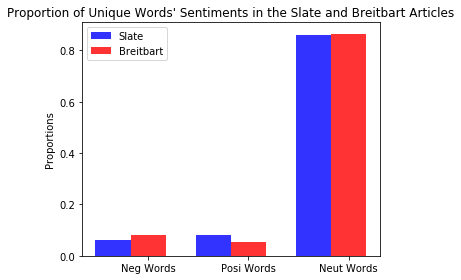

In [66]:
n_groups = 3
props_slate = (neg_prop_slate, posi_prop_slate, neut_prop_slate)
props_breitbart = (neg_prop_breitbart, posi_prop_breitbart, neut_prop_breitbart)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

#color/legend for the bars
rects1 = plt.bar(index, props_slate, bar_width,
alpha=opacity,
color='b',
label='Slate')

rects2 = plt.bar(index + bar_width, props_breitbart, bar_width,
alpha=opacity,
color='r',
label='Breitbart')

#label the axes, give it a title
plt.xlabel('')
plt.ylabel('Proportions')
plt.title('Proportion of Unique Words\' Sentiments in the Slate and Breitbart Articles')
plt.xticks(index + bar_width, ('Neg Words', 'Posi Words', 'Neut Words'))
plt.legend()

plt.tight_layout()
plt.show()

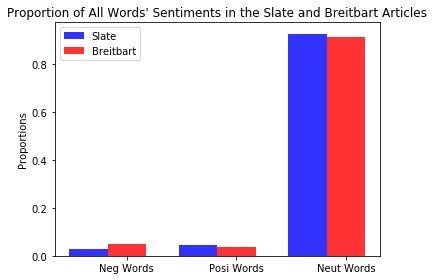

In [68]:
n_groups = 3
props_slate = (all_neg_prop_slate, all_posi_prop_slate, all_neut_prop_slate)
props_breitbart = (all_neg_prop_breitbart, all_posi_prop_breitbart, all_neut_prop_breitbart)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

#color/legend for the bars
rects1 = plt.bar(index, props_slate, bar_width,
alpha=opacity,
color='b',
label='Slate')

rects2 = plt.bar(index + bar_width, props_breitbart, bar_width,
alpha=opacity,
color='r',
label='Breitbart')

#label the axes, give graph a title
plt.xlabel('')
plt.ylabel('Proportions')
plt.title('Proportion of All Words\' Sentiments in the Slate and Breitbart Articles')
plt.xticks(index + bar_width, ('Neg Words', 'Posi Words', 'Neut Words'))
plt.legend()

plt.tight_layout()
plt.show()

## Final Analysis

I expected for the Breitbart article to contain a greater percentage of positive words than that of the Slate article, but that is not the case. The fact that the data goes against my assumptions raises the question regarding the context of the negative/positive words. Additionally, the proportions/difference between them for the two articles are largely similar when analyzing all words and unique words

Potentially, the negative words in the Breitbart article can be negative towards the left and Hillary Clinton. Additionally, the positive words in the Slate article can be not about Donald Trump getting elected, but positive words that are trying to be hopeful and uplift the Democrats, who just lost.

All in all, this analysis demonstrates how important it is to understand the context of words when performing sentiment analysis. Furthermore, as an American and frequent consumer of the news, it is reassuring that even the most biased/politcally charged news sources write with an overwhelming majority of neutral words.